# Lab 1 Evaluation

Names, Surnames, and Group : (to complete by 2 students)

In [ ]:
IMBERGAMO GUASCH Joel, ROBERT Gwenael

In the following, we consider the  (binarized) Compas dataset that we studied in the Lab

Q1: A decision tree configuration is a set of parameters that one can use to build decision trees. Propose 6 configurations that are likely to provide different topologies and caracteristics

In [18]:

from sklearn.model_selection import train_test_split
from utils import load_from_csv
from sklearn import tree
import numpy as np


train_examples, train_labels, features, prediction = load_from_csv("./compass.csv")

def train(trees, x_train=[], y_train=[], x_test=[], y_test=[]):
    res = {}
    trained_trees = {}
    for key, t in trees.items():
        trained_tree = t.fit(x_train, y_train)
        predictions = np.sum(trained_tree.predict(x_test) == y_test)
        res[key] = predictions/len(x_test)
        trained_trees[key] = trained_tree
    return res, trained_trees

x_train, x_test, y_train, y_test = train_test_split(train_examples, train_labels, test_size = 0.20)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

trees = {
    "default": tree.DecisionTreeClassifier(),
    "max_depht_10": tree.DecisionTreeClassifier(max_depth=10),
    "splitter_best": tree.DecisionTreeClassifier(splitter="best"),
    "splitter_rand": tree.DecisionTreeClassifier(splitter="random"),
    "min_leaf_10": tree.DecisionTreeClassifier(min_samples_leaf=10),
    "rand + min_eaf_100": tree.DecisionTreeClassifier(min_samples_leaf=10,splitter="random",max_depth=5),
    "depth 5": tree.DecisionTreeClassifier(max_depth=5),
}

5273


Q2: Train a decision tree for each of the previous configurations on the full dataset

In [7]:
tree_results, _ = train(trees, x_train=x_train, y_train=y_train,x_test=x_test, y_test=y_test)
print(tree_results)

{'default': 0.6540284360189573, 'max_depht_10': 0.6549763033175355, 'splitter_best': 0.6559241706161137, 'splitter_rand': 0.6559241706161137, 'min_leaf_10': 0.6549763033175355, 'rand + min_eaf_100': 0.6436018957345971, 'depth 5': 0.6502369668246446}


Q3: Propose an evaluation in terms of training and testing accuracies using $5$-cross validation on two decision trees that have different topologies

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from matplotlib import pyplot as plt


def train2(trees, X, Y, splits=5):
    res = {}
    for key, t in trees.items():
        res[key] = cross_val_score(t, X, Y, cv = KFold(n_splits = splits)).mean()
    return res

trees = {
    "default": tree.DecisionTreeClassifier(),
    "max_depht_10": tree.DecisionTreeClassifier(max_depth=10),
    "splitter_best": tree.DecisionTreeClassifier(splitter="best"),
    "splitter_rand": tree.DecisionTreeClassifier(splitter="random"),
    "min_leaf_10": tree.DecisionTreeClassifier(min_samples_leaf=10),
    "rand + min_leaf_100": tree.DecisionTreeClassifier(min_samples_leaf=10,splitter="random",max_depth=5),
    "depth 5": tree.DecisionTreeClassifier(max_depth=5),
    "depth 3 + min 32": tree.DecisionTreeClassifier(max_depth=3,min_samples_leaf=32),
}


Q4: Propose an experimental study that shows the transition phase from underfitting to overfitting 

3
32


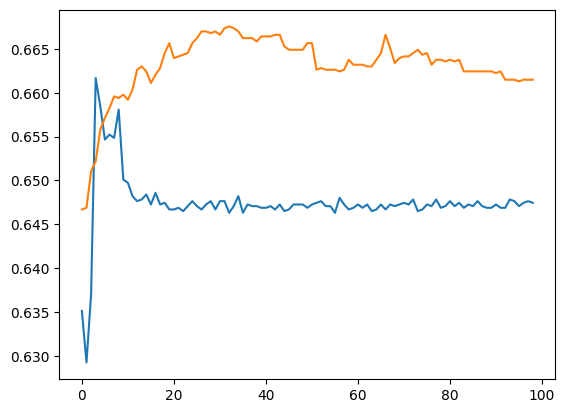

In [14]:
depth_tree = {i: tree.DecisionTreeClassifier(max_depth=i) for i in  range(1,100)}
res = [v for _,v in train2(depth_tree, train_examples,train_labels).items()]
plt.plot(res)
print(res.index(max(res)))
min_leaf_tree = {i: tree.DecisionTreeClassifier(min_samples_leaf=i) for i in  range(1,100)}
res = [v for _,v in train2(min_leaf_tree, train_examples,train_labels).items()]
plt.plot(res)
print(res.index(max(res)))

Q5: Construct the confusion matrix on a particular good configuration (after explaining your choice)

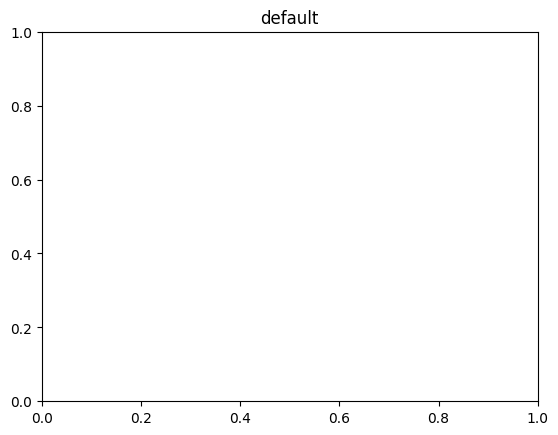

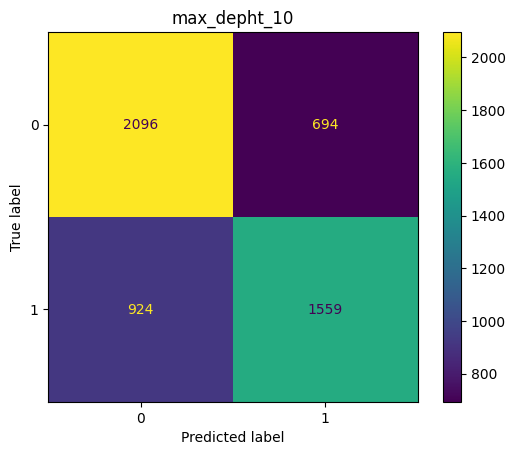

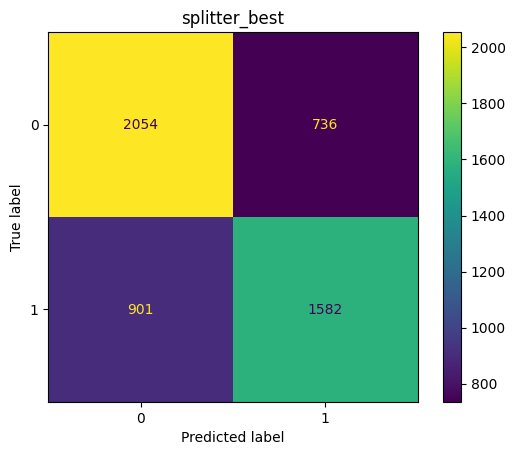

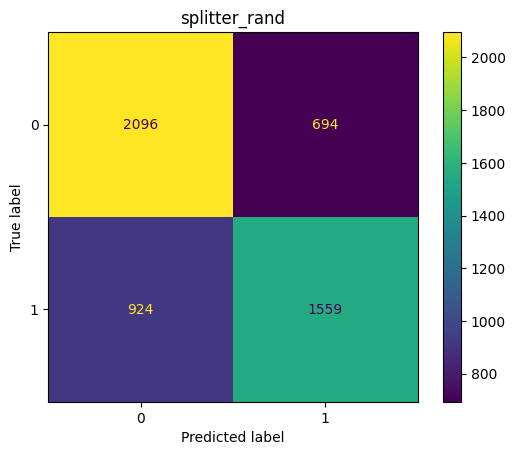

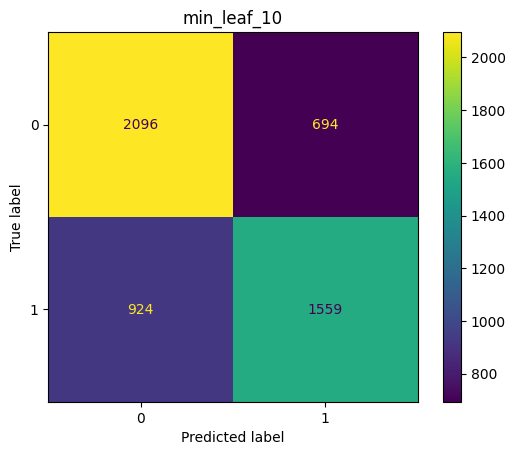

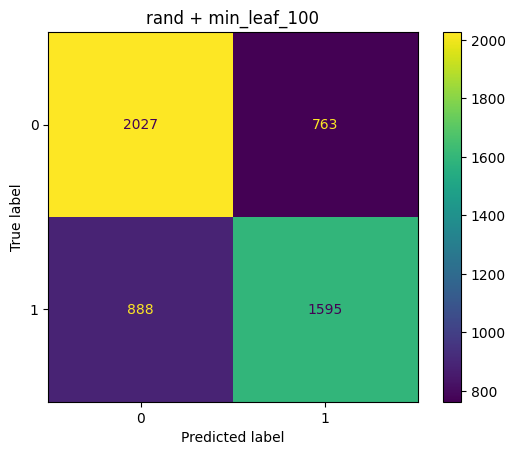

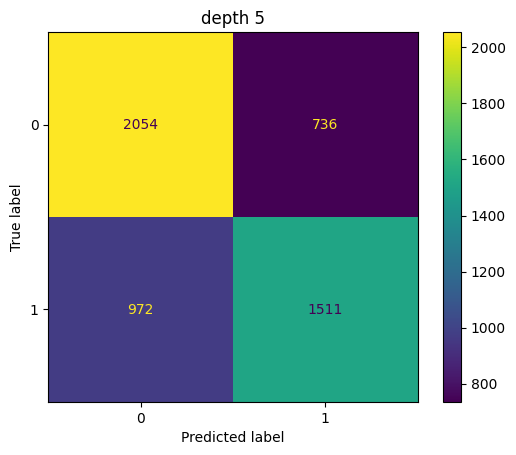

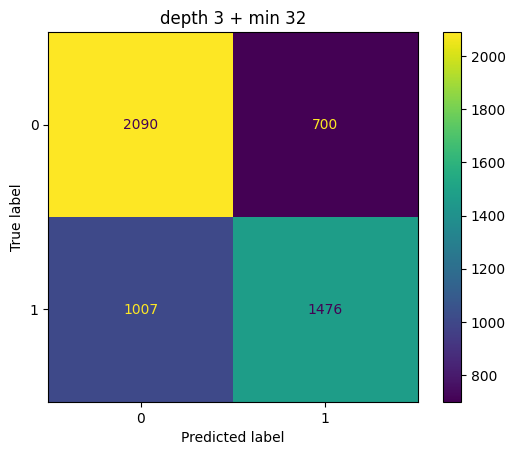

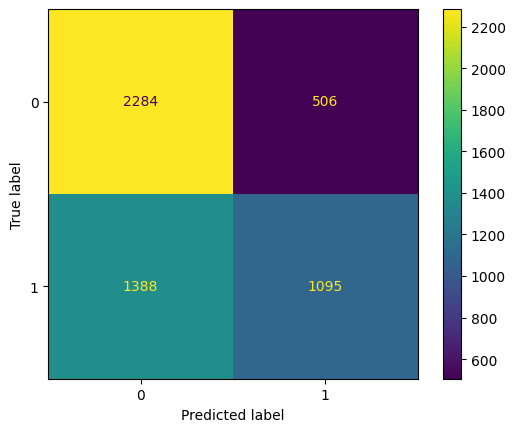

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay
import sklearn


for cm,(k,v) in zip([sklearn.metrics.confusion_matrix(train_labels, t.fit(train_examples, train_labels).predict(train_examples)) for k,t in trees.items()],trees.items()):
    plt.title(k)
    ConfusionMatrixDisplay(cm).plot()

# We should minimise the false positives to avoid convicting people that dont deserve it, so from the models we've trained we should use the "rand+min_eaf_100"

Q6: Provide an evaluation of the fairness of the model based on the False Positive Rate